In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import os
import random

In [2]:
file_path = os.path.join("..", "Resources", "housingCensus.csv")
housingCensusDF = pd.read_csv(file_path)
print(f"Data Shape: {housingCensusDF.shape}")
housingCensusDF.head()

Data Shape: (427, 34)


,Geo_ID,Geographic Area Name,Year,Estimate HOUSING OCCUPANCY Total housing units,Estimate HOUSING OCCUPANCY Occupied housing units,Estimate HOUSING OCCUPANCY Vacant housing units,Estimate YEAR STRUCTURE BUILT Total housing units,Estimate YEAR STRUCTURE BUILT Built 2005 or later,Estimate YEAR STRUCTURE BUILT Built 2000 to 2004,Estimate YEAR STRUCTURE BUILT Built 1990 to 1999,...,"Estimate VALUE Less than $50,000","Estimate VALUE $50,000 to $99,999","Estimate VALUE $100,000 to $149,999","Estimate VALUE $150,000 to $199,999","Estimate VALUE $200,000 to $299,999","Estimate VALUE $300,000 to $499,999","Estimate VALUE $500,000 to $999,999","Estimate VALUE $1,000,000 or more",Estimate VALUE Median (dollars),State
0,1,United States,2012,132452249.0,115969540.0,16482709.0,132452249.0,1199560.0,19799406.0,18348209.0,...,6784356,12100148,12245474,11370120,13393416,11068593,5696677,1460472,171900.0,Texas
1,1000,"Abilene city, Texas",2012,48583.0,42756.0,5827.0,48583.0,669.0,4371.0,3133.0,...,4654,7085,4910,3475,1338,645,71,0,95300.0,Texas
2,1924,"Allen city, Texas",2012,28802.0,28574.0,228.0,28802.0,1026.0,12728.0,7679.0,...,80,425,3321,6738,5524,3323,1345,286,199600.0,Texas
3,3000,"Amarillo city, Texas",2012,80816.0,74018.0,6798.0,80816.0,669.0,9818.0,6229.0,...,5144,13317,13526,6681,4093,1670,571,102,115000.0,Texas
4,4000,"Arlington city, Texas",2012,147340.0,132941.0,14399.0,147340.0,755.0,19901.0,28780.0,...,3302,16210,26830,13884,9746,2086,860,79,129100.0,Texas


In [3]:
file_path = os.path.join("..", "Resources", "analysis_crime.csv")
crimeDF = pd.read_csv(file_path)
print(f"Data Shape: {crimeDF.shape}")
crimeDF.head()

Data Shape: (70, 9)


,City,Year,Population,Violent Crime,Property Crime,Total Crime,"Total Crime Per Capita [10,000]","Violent Crime Per Capita [10,000]","Property Crime Per Capita [10,000]"
0,Baytown,2012,74420.0,247.0,3684.0,3931.0,528.218221,33.190003,495.028218
1,Friendswood,2012,36965.0,15.0,353.0,368.0,99.553632,4.057893,95.495739
2,Galveston,2012,49170.0,296.0,2469.0,2765.0,562.334757,60.199309,502.135448
3,Houston,2012,2177273.0,21610.0,107678.0,129288.0,593.807024,99.252597,494.554427
4,La Porte,2012,35054.0,61.0,604.0,665.0,189.707309,17.401723,172.305586


In [4]:
housingPriceRangeDF= pd.DataFrame(housingCensusDF[['Geo_ID', 'Year', 'Geographic Area Name', 'Estimate VALUE Less than $50,000','Estimate VALUE $50,000 to $99,999','Estimate VALUE $100,000 to $149,999',
                   'Estimate VALUE $150,000 to $199,999','Estimate VALUE $200,000 to $299,999','Estimate VALUE $300,000 to $499,999','Estimate VALUE $500,000 to $999,999',
                   'Estimate VALUE $1,000,000 or more','Estimate VALUE Median (dollars)']])

housingPriceRangeDF.head()

,Geo_ID,Year,Geographic Area Name,"Estimate VALUE Less than $50,000","Estimate VALUE $50,000 to $99,999","Estimate VALUE $100,000 to $149,999","Estimate VALUE $150,000 to $199,999","Estimate VALUE $200,000 to $299,999","Estimate VALUE $300,000 to $499,999","Estimate VALUE $500,000 to $999,999","Estimate VALUE $1,000,000 or more",Estimate VALUE Median (dollars)
0,1,2012,United States,6784356,12100148,12245474,11370120,13393416,11068593,5696677,1460472,171900.0
1,1000,2012,"Abilene city, Texas",4654,7085,4910,3475,1338,645,71,0,95300.0
2,1924,2012,"Allen city, Texas",80,425,3321,6738,5524,3323,1345,286,199600.0
3,3000,2012,"Amarillo city, Texas",5144,13317,13526,6681,4093,1670,571,102,115000.0
4,4000,2012,"Arlington city, Texas",3302,16210,26830,13884,9746,2086,860,79,129100.0


In [5]:
housingPriceRangeDF['Geographic Area Name'] = housingPriceRangeDF['Geographic Area Name'].replace("city, Texas","", regex=True)

housingPriceRangeDF['Geographic Area Name'] = housingPriceRangeDF['Geographic Area Name'].replace(", Texas","", regex=True)
housingPriceRangeDF['Geographic Area Name'] = housingPriceRangeDF['Geographic Area Name'].str.strip()

housingPriceRangeDF['Estimate VALUE Less than $150,000'] = housingPriceRangeDF['Estimate VALUE Less than $50,000'] + housingPriceRangeDF['Estimate VALUE $50,000 to $99,999'] + housingPriceRangeDF['Estimate VALUE $100,000 to $149,999']
housingPriceRangeDF['Estimate VALUE $150,000 to $299,999'] =  housingPriceRangeDF['Estimate VALUE $150,000 to $199,999'] + housingPriceRangeDF['Estimate VALUE $200,000 to $299,999']
housingPriceRangeDF['Estimate VALUE Between 0 and $300,000'] = housingPriceRangeDF['Estimate VALUE Less than $150,000'] + housingPriceRangeDF['Estimate VALUE $150,000 to $299,999']
 
housingPriceRangeDF.head()

,Geo_ID,Year,Geographic Area Name,"Estimate VALUE Less than $50,000","Estimate VALUE $50,000 to $99,999","Estimate VALUE $100,000 to $149,999","Estimate VALUE $150,000 to $199,999","Estimate VALUE $200,000 to $299,999","Estimate VALUE $300,000 to $499,999","Estimate VALUE $500,000 to $999,999","Estimate VALUE $1,000,000 or more",Estimate VALUE Median (dollars),"Estimate VALUE Less than $150,000","Estimate VALUE $150,000 to $299,999","Estimate VALUE Between 0 and $300,000"
0,1,2012,United States,6784356,12100148,12245474,11370120,13393416,11068593,5696677,1460472,171900.0,31129978,24763536,55893514
1,1000,2012,Abilene,4654,7085,4910,3475,1338,645,71,0,95300.0,16649,4813,21462
2,1924,2012,Allen,80,425,3321,6738,5524,3323,1345,286,199600.0,3826,12262,16088
3,3000,2012,Amarillo,5144,13317,13526,6681,4093,1670,571,102,115000.0,31987,10774,42761
4,4000,2012,Arlington,3302,16210,26830,13884,9746,2086,860,79,129100.0,46342,23630,69972


In [6]:
cityNames = [70808 ,41980, 16432,35000, 48804, 7000, 56000,  77546, 77550, 77551 ]

housingPriceHoustonDF = housingPriceRangeDF[housingPriceRangeDF['Geo_ID'].isin(cityNames)]


housingPriceHoustonDF = housingPriceHoustonDF.rename(columns={'Geographic Area Name': 'City'})

#housingPriceHoustonDF.to_csv('houstonHousing.csv', index = False)

housingPriceHoustonDF = housingPriceHoustonDF.reset_index(drop = True)

print(housingPriceHoustonDF)
#

    Geo_ID  Year           City  Estimate VALUE Less than $50,000  \
0     7000  2012       Beaumont                              5510   
1    35000  2012        Houston                             25598   
2    41980  2012    League City                               892   
3    48804  2012  Missouri City                               248   
4    56000  2012       Pasadena                              3347   
..     ...   ...            ...                               ...   
63   77550  2016      Galveston                              2624   
64   77550  2017      Galveston                              2733   
65   77551  2017       La Porte                              2935   
66   77550  2018      Galveston                              2876   
67   77551  2018       La Porte                              2952   

    Estimate VALUE $50,000 to $99,999  Estimate VALUE $100,000 to $149,999  \
0                                7369                                 4731   
1              

In [7]:
# crime data filtered
 
mergedDF = pd.merge(crimeDF, housingPriceHoustonDF, on = ['City', 'Year'], how='inner' )

print (mergedDF)

             City  Year  Population  Violent Crime  Property Crime  \
0     Friendswood  2012     36965.0           15.0           353.0   
1       Galveston  2012     49170.0          296.0          2469.0   
2         Houston  2012   2177273.0        21610.0        107678.0   
3        La Porte  2012     35054.0           61.0           604.0   
4     League City  2012     86127.0           79.0          1734.0   
5   Missouri City  2012     70819.0           86.0           879.0   
6        Pasadena  2012    154562.0          622.0          5610.0   
7      Sugar Land  2012     82924.0          109.0          1541.0   
8     Friendswood  2013     37226.0           11.0           418.0   
9       Galveston  2013     48067.0          236.0          2335.0   
10        Houston  2013   2180606.0        20993.0        110919.0   
11       La Porte  2013     34671.0           40.0           593.0   
12    League City  2013     89596.0           96.0          1918.0   
13  Missouri City  2

The  r-value is: -0.25093962844880147


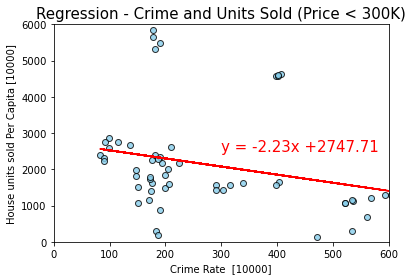

In [28]:
# without building cluster, the analysis for the house sold

x_values = mergedDF ['Total Crime Per Capita [10,000]']
y_values = (mergedDF['Estimate VALUE Between 0 and $300,000'] /mergedDF['Population']) * 10000
#df_LessThan300000 ['CrimeRandom'] = crimeRandomSample
#df_GreaterThan500000['CrimeRandom'] = crimeRandomSample

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values )

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8, color ='skyblue', marker="o", edgecolor="black")
plt.plot(x_values,regress_values,"r-")


# Label plot and annotate the line equation
plt.xlabel('Crime Rate  [10000]')
plt.ylabel('House units sold Per Capita [10000]')
plt.title('Regression - Crime and Units Sold (Price < 300K)', size=15)
plt.ylim(0, 6000)
plt.xlim(0,600)
plt.text(300,2500,line_eq, fontsize=15,color="red")
 

# Save the plotted figures as .pngs
output_path = os.path.join("..", "Images", "Regression-Crime and Units Sold (0-300k) no cluster.png")
plt.savefig(output_path)

print(f"The  r-value is: {rvalue}")


In [80]:
#build crime random sample for cluster

x_list = mergedDF['Total Crime Per Capita [10,000]']
crimeRandomSample = []
 
for item in x_list :
    limit = 0.20 * item
    lowLimit = item - limit
    upperLimit = item + limit
    for i in range (1,12) :     
        if (i % 2 == 0):
            x = round(random.uniform(lowLimit, item ),2)
        else :
            x = round(random.uniform(item, upperLimit ),2)
        crimeRandomSample.append(x)

len (crimeRandomSample)   

# for item in y_list :
#     for i in range (1,12) :
#         if (item < previousItem) :
#             x = round(random.uniform(item, previousItem ),2)
#         else :
#             x = round(random.uniform(previousItem, item ),2)
#         crimeRandomSample.append(x)
#         previousitem = x
        
crimeRandomSampledf = pd.DataFrame(crimeRandomSample)

crimeRandomSampledf
        

,0
0,107.55
1,95.15
2,108.57
3,83.39
4,111.73
...,...
611,165.87
612,144.92
613,158.18
614,126.69


In [78]:
#build price bin samples for values less than $300000

y_list = (mergedDF['Estimate VALUE Between 0 and $300,000'] /mergedDF['Population']) * 10000

priceLessThan300kRandomSample = []

previousItem = 0 

for item in y_list :    
    limit = 0.20 * item
    lowLimit = item - limit
    upperLimit = item + limit
    
    for i in range (1,12) : 
        if (i%2 == 0) :
            x = round(random.uniform(lowLimit, item ),2)
        else :
            x = round(random.uniform(item, upperLimit ),2)
        priceLessThan300kRandomSample.append(x)
        
len (priceLessThan300kRandomSample)    


616

The  r-value is: -0.22371174171121663


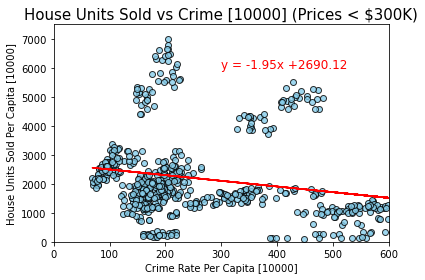

In [83]:

x_values = crimeRandomSampledf [0]
y_values = priceLessThan300kRandomSample
#df_LessThan300000 ['CrimeRandom'] = crimeRandomSample
#df_GreaterThan500000['CrimeRandom'] = crimeRandomSample

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values )

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8, color ='skyblue', marker="o", edgecolor="black")
plt.plot(x_values,regress_values,"r-")


# Label plot and annotate the line equation
plt.xlabel('Crime Rate Per Capita [10000]')
plt.ylabel('House Units Sold Per Capita [10000]')
plt.title('House Units Sold vs Crime [10000] (Prices < $300K)', size=15)
plt.ylim(0, 7500)
plt.xlim(0,600)
plt.text(300,6000,line_eq, fontsize=12,color="red")
 

# Save the plotted figures as .pngs
output_path = os.path.join("..", "Images", "House Units Sold Vs Crime(less300K).png")
plt.savefig(output_path)

print(f"The  r-value is: {rvalue}")


The  r-value is: -0.4048669682512176


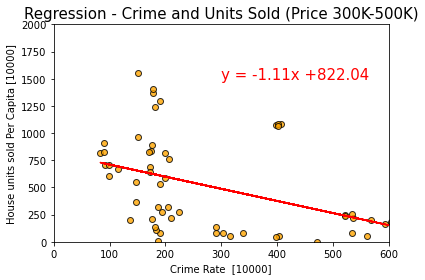

In [29]:
# without building cluster, the analysis for the house sold

x_values = mergedDF ['Total Crime Per Capita [10,000]']
y_values = (mergedDF['Estimate VALUE $300,000 to $499,999']/mergedDF['Population']) * 10000 
#df_LessThan300000 ['CrimeRandom'] = crimeRandomSample
#df_GreaterThan500000['CrimeRandom'] = crimeRandomSample

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values )

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8, color ='orange', marker="o", edgecolor="black")
plt.plot(x_values,regress_values,"r-")


# Label plot and annotate the line equation
plt.xlabel('Crime Rate  [10000]')
plt.ylabel('House units sold Per Capita [10000]')
plt.title('Regression - Crime and Units Sold (Price 300K-500K)', size=15)
plt.ylim(0, 2000)
plt.xlim(0,600)
plt.text(300,1500,line_eq, fontsize=15,color="red")
 

# Save the plotted figures as .pngs
output_path = os.path.join("..", "Images", "Regression-Crime and Units Sold (300k-500k) no cluster.png")
plt.savefig(output_path)

print(f"The  r-value is: {rvalue}")


In [57]:
#build price bin samples for values between $300000 and $499999

y_list = (mergedDF['Estimate VALUE $300,000 to $499,999']/mergedDF['Population']) * 10000   

priceLessBtn300kAnd500kRandomSample = []


for item in y_list :    
    limit = 0.25 * item
    lowLimit = item - limit
    upperLimit = item + limit
    
    for i in range (1,12) : 
        if (i%2 == 0) :
            x = round(random.uniform(lowLimit, item ),2)
        else :
            x = round(random.uniform(item, upperLimit ),2)
        priceLessBtn300kAnd500kRandomSample.append(x)

# for item in y_list :
#     for i in range (1,10) :
#         if (item < previousItem) :
#             x = round(random.uniform(item, previousItem ),2)
#         else :
#             x = round(random.uniform(previousItem, item ),2)
#         priceLessBtn300kAnd500kRandomSample.append(x)
#         previousitem = x

len (priceLessBtn300kAnd500kRandomSample)    

616

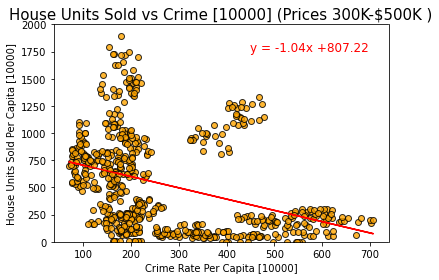

The r-value is: -0.370673355945336


In [58]:
x_values = crimeRandomSampledf [0]
y_values = priceLessBtn300kAnd500kRandomSample
#df_LessThan300000 ['CrimeRandom'] = crimeRandomSample
#df_GreaterThan500000['CrimeRandom'] = crimeRandomSample

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values )

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8, color ='orange', marker="o", edgecolor="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Crime Rate Per Capita [10000]')
plt.ylabel('House Units Sold Per Capita [10000]')

plt.ylim(0, 2000)
plt.text(450,1750,line_eq, fontsize=12,color="red")

plt.title('House Units Sold vs Crime [10000] (Prices 300K-$500K )', size=15)

# Save the plotted figures as .pngs
output_path = os.path.join("..", "Images", "House Units Sold Vs Crime(300k-500k1).png")
plt.savefig(output_path)

plt.show()
print(f"The r-value is: {rvalue}")

The  r-value is: -0.3125834355942882


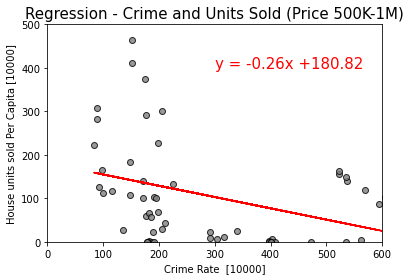

In [30]:
# without building cluster, the analysis for the house sold

x_values = mergedDF ['Total Crime Per Capita [10,000]']
y_values = (mergedDF['Estimate VALUE $500,000 to $999,999'] /mergedDF['Population']) * 10000 
#df_LessThan300000 ['CrimeRandom'] = crimeRandomSample
#df_GreaterThan500000['CrimeRandom'] = crimeRandomSample

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values )

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8, color ='grey', marker="o", edgecolor="black")
plt.plot(x_values,regress_values,"r-")


# Label plot and annotate the line equation
plt.xlabel('Crime Rate  [10000]')
plt.ylabel('House units sold Per Capita [10000]')
plt.title('Regression - Crime and Units Sold (Price 500K-1M)', size=15)
plt.ylim(0, 500)
plt.xlim(0,600)
plt.text(300,400,line_eq, fontsize=15,color="red")
 

# Save the plotted figures as .pngs
output_path = os.path.join("..", "Images", "Regression-Crime and Units Sold (500k-1M) no cluster.png")
plt.savefig(output_path)

print(f"The  r-value is: {rvalue}")


In [59]:
#build price bin samples for values between $300000 and $499999

y_list = (mergedDF['Estimate VALUE $500,000 to $999,999'] /mergedDF['Population']) * 10000   

priceLessBtn500kAnd1MRandomSample = []

for item in y_list :    
    limit = 0.25 * item
    lowLimit = item - limit
    upperLimit = item + limit
    
    for i in range (1,12) : 
        if (i%2 == 0) :
            x = round(random.uniform(lowLimit, item ),2)
        else :
            x = round(random.uniform(item, upperLimit ),2)
        priceLessBtn500kAnd1MRandomSample.append(x)
         

len (priceLessBtn500kAnd1MRandomSample)    

616

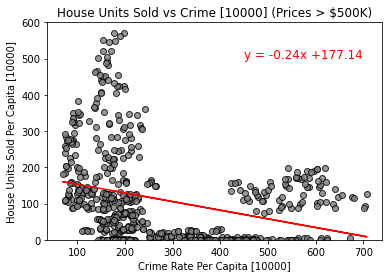

The r-value is: -0.28529136275261474


In [60]:
x_values = crimeRandomSampledf [0]
y_values = priceLessBtn500kAnd1MRandomSample
#df_LessThan300000 ['CrimeRandom'] = crimeRandomSample
#df_GreaterThan500000['CrimeRandom'] = crimeRandomSample

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values )

 
# Get regression values
regress_values = x_values * slope + intercept

 # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, alpha=0.8, color ='grey', marker="o", edgecolor="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Crime Rate Per Capita [10000]')
plt.ylabel('House Units Sold Per Capita [10000]')

plt.ylim(0, 600)
plt.text(450,500,line_eq, fontsize=12,color="red")

plt.title('House Units Sold vs Crime [10000] (Prices > $500K)', size=12)

# Save the plotted figures as .pngs
output_path = os.path.join("..", "Images", "House Units Sold Vs Crime(greater500k).png")
plt.savefig(output_path)

#show the graph
plt.show()
print(f"The r-value is: {rvalue}")